In [1]:
#######################################################
#######################################################
#######################################################

## Logistic Regression: Logistic Regression - 3 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 2 of LogisticRegression - LogisticRegression for Tasks 1-8
#### Task 1
##### Import the required packages. (Revisit this question as you complete the remaining exercises)
##### Set the working directory to data directory.
##### Print the working directory.
##### Import the dataset as `ex_df`.
##### Subset the DataFrame to include only numeric and categorical columns.
#### Result:


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# Scikit-learn package for logistic regression.
from sklearn import linear_model
# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Scikit-learn packages for evaluating model performance.
from sklearn import metrics
# Scikit-learn package for data preprocessing.
from sklearn import preprocessing

from pathlib import Path
# Set 'main_dir' to location of the project folder.
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)
# Import the dataset
ex_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Subset data
ex_df_subset = ex_df[['creatinine_phosphokinase', 'age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets', 'smoking', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'death_event', 'id']]


C:\
C:\/data


#### Task 2
##### If target is not binary, convert it to binary (Hint: calculate the mean and assign the above mean to 1 and below to 0).
#### Result:


In [3]:

# Target not binary
ex_threshold = np.mean(ex_df_subset['death_event'])
ex_df_subset['death_event'] = np.where(ex_df_subset['death_event'] > ex_threshold, 0,1)


#### Task 3
##### Identify the two unique classes.
##### Convert ex_target to `bool` so that it is a binary class.
##### Check and convert NAs.
##### Delete columns containing either 50% or more than 50% NaN Values.
#### Result:


In [4]:
# Identify the two unique classes.
unique_values = sorted(ex_df_subset['death_event'].unique())
ex_df_subset['death_event'] = np.where(ex_df_subset['death_event'] == unique_values[0],  False,True)

 # Check for NAs. 
print(ex_df_subset.isnull().sum())

# Delete columns containing either 60% or more than 60% NaN Values.
ex_perc = 60.0
ex_min_count =  int(((100-ex_perc)/100)*ex_df_subset.shape[0] + 1)
ex_df_subset = ex_df_subset.dropna(axis=1, 
               thresh=ex_min_count)
print(ex_df_subset.shape)



creatinine_phosphokinase    0
age                         0
time                        0
serum_creatinine            0
ejection_fraction           0
serum_sodium                0
platelets                   0
smoking                     0
anaemia                     0
diabetes                    0
high_blood_pressure         0
sex                         0
death_event                 0
id                          0
dtype: int64
(299, 14)


#### Task 4
##### Write a function to impute NAs in both numeric and categorical columns.
##### Split the data into X and y .
##### Convert the categorical data to dummy variables.
##### Set a seed and split data into train and test sets, use a 70 train - 30 test split.
#### Result:


In [5]:
# Function to impute NA in both numeric and categorical columns
def fillna(ex_df):
    # Fill numeric columns with mean value
    ex_df = ex_df.fillna(ex_df.mean())    
    # Fill categorical columns with mode value
    ex_df = ex_df.fillna(ex_df.mode().iloc[0])
    return ex_df
  
ex_df_subset = fillna(ex_df_subset)

# Split the data into X and y 
ex_columns_to_drop_from_X = ['death_event'] + ['id']
ex_X = ex_df_subset.drop(ex_columns_to_drop_from_X, axis=1)
ex_y = np.array(ex_df_subset['death_event'])

# Convert categorical variables to dummy variables
ex_X = pd.get_dummies(ex_X, columns = ['smoking', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex'], dtype=float, drop_first=True)
print(ex_X.dtypes)

# Set the seed.
np.random.seed(1)

# Split data into train and test sets, use a 70 train - 30 test split.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, 
                                                    ex_y, 
                                                    test_size = .3)
                                                  



creatinine_phosphokinase      int64
age                         float64
time                          int64
serum_creatinine            float64
ejection_fraction             int64
serum_sodium                  int64
platelets                   float64
smoking_1                   float64
anaemia_1                   float64
diabetes_1                  float64
high_blood_pressure_1       float64
sex_1                       float64
dtype: object


#### Task 5
##### Scale the features by fitting MinMaxScaler on the training data.
##### Set up logistic regression model.
##### Fit the model.
##### Predict on test data.
#### Result:


In [6]:
# Scale the features.
ex_scaler = preprocessing.MinMaxScaler()
ex_scaler.fit(ex_X_train)
ex_X_train_scaled = ex_scaler.transform(ex_X_train)
ex_X_test_scaled = ex_scaler.transform(ex_X_test)

# Set up logistic regression model.
ex_logistic_regression_model = linear_model.LogisticRegression()
print(ex_logistic_regression_model)  
# Fit the model.
ex_logistic_regression_model.fit(ex_X_train_scaled, 
                              ex_y_train)
# Predict on test data.
ex_predicted_values = ex_logistic_regression_model.predict(ex_X_test_scaled)
print(ex_predicted_values[:20])                              
                              



LogisticRegression()
[ True  True False  True  True  True  True  True False  True  True False
 False  True  True  True  True  True  True  True]


#### Task 6
##### Take a look at test data confusion matrix.
##### Compute test model accuracy score.
##### Create a list of ex_target names to interpret class assignments.
#### Result:


In [7]:
# Take a look at test data confusion matrix.
ex_conf_matrix_test = metrics.confusion_matrix(ex_y_test, ex_predicted_values)
print(ex_conf_matrix_test)

# Compute test model accuracy score.
ex_test_accuracy_score = metrics.accuracy_score(ex_y_test, ex_predicted_values)
print("Accuracy on test data: ", ex_test_accuracy_score)

# Create a list of ex_target names to interpret class assignments.
ex_target_names = ex_df_subset['death_event'].unique()
ex_target_names = ex_target_names.tolist()
ex_target_names = [str(x) for x in ex_target_names]



[[15 11]
 [ 4 60]]
Accuracy on test data:  0.8333333333333334


#### Task 7
##### Print an entire classification report.
##### Get probabilities instead of predicted values.
##### Get probabilities of test predictions only.
#### Result:


In [8]:

# Print an entire classification report.
ex_class_report = metrics.classification_report(ex_y_test, 
                                             ex_predicted_values, 
                                             target_names = ex_target_names)
print(ex_class_report)
# Get probabilities instead of predicted values.
ex_test_probabilities = ex_logistic_regression_model.predict_proba(ex_X_test_scaled)
print(ex_test_probabilities[0:5, :])

# Get probabilities of test predictions only.
ex_test_predictions = ex_test_probabilities[:, 1]
print(ex_test_predictions[0:5])



              precision    recall  f1-score   support

       False       0.79      0.58      0.67        26
        True       0.85      0.94      0.89        64

    accuracy                           0.83        90
   macro avg       0.82      0.76      0.78        90
weighted avg       0.83      0.83      0.82        90

[[0.27219134 0.72780866]
 [0.03831386 0.96168614]
 [0.57891227 0.42108773]
 [0.28278144 0.71721856]
 [0.14900023 0.85099977]]
[0.72780866 0.96168614 0.42108773 0.71721856 0.85099977]


#### Task 8
##### Get FPR, TPR, and threshold values.
##### Get AUC by providing the FPR and TPR.
##### Make an ROC curve plot.
#### Result:


False positive:  [0.         0.         0.         0.03846154 0.03846154]
True positive:  [0.       0.015625 0.359375 0.359375 0.578125]
Threshold:  [1.98213886 0.98213886 0.86423049 0.85704074 0.7697114 ]
Area under the ROC curve:  0.873798076923077


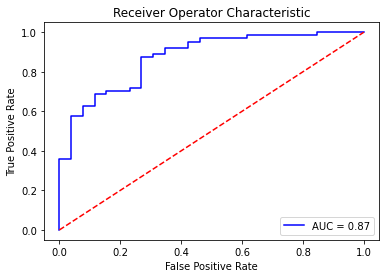

In [9]:
# Get FPR, TPR, and threshold values.
ex_fpr, ex_tpr, ex_threshold = metrics.roc_curve(ex_y_test, ex_test_predictions) 
print("False positive: ", ex_fpr[:5])
print("True positive: ", ex_tpr[:5])
print("Threshold: ", ex_threshold[:5])

# Get AUC by providing the FPR and TPR.
ex_auc = metrics.auc(ex_fpr, ex_tpr)
print("Area under the ROC curve: ", ex_auc)

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(ex_fpr, ex_tpr, 'b', label = 'AUC = %0.2f' % ex_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


#### Please refer to module 3 of LogisticRegression - LogisticRegression for Tasks 9-13
#### Task 9
##### Compute trained model accuracy score. Complete the code by filling in the None:ex_trained_accuracy_score = logistic_regression_model.score(None, None)
##### Create regularization penalty space with l1 and l2.
##### Create regularization constant space.
#### Result:


In [10]:
# Compute trained model accuracy score.
ex_trained_accuracy_score = ex_logistic_regression_model.score(ex_X_train_scaled, ex_y_train)
print("Accuracy on train data: " , ex_trained_accuracy_score)

# Create regularization penalty space.
ex_penalty = ['l1', 'l2']
# Create regularization constant space.
ex_C = np.logspace(0, 10, 10)
print("Regularization constant: ", ex_C)

# Create hyperparameter options dictionary.
ex_hyperparameters = dict(C = ex_C, penalty = ex_penalty)
print(ex_hyperparameters)



Accuracy on train data:  0.8421052631578947
Regularization constant:  [1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]
{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]), 'penalty': ['l1', 'l2']}


#### Task 10
##### Execute a grid search 15-fold cross-validation with above parameters.
##### Fit CV grid search and print the best_model
#### Result:


In [11]:
# Grid search 15-fold cross-validation with above parameters.
ex_clf = GridSearchCV(linear_model.LogisticRegression(solver='liblinear'),
                   ex_hyperparameters,
                   cv = 15,                         
                   verbose = 0)                       
# Fit CV grid search.
ex_best_model = ex_clf.fit(ex_X_train_scaled, ex_y_train)
print(ex_best_model)                   
                  


GridSearchCV(cv=15, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})


#### Task 11
##### Get best penalty and constant parameters.
#### Result:


In [12]:
# Get best penalty and constant parameters.
ex_penalty = ex_best_model.best_estimator_.get_params()['penalty']
ex_constant = ex_best_model.best_estimator_.get_params()['C']
print('Best penalty: ', ex_penalty)
print('Best C: ', ex_constant)



Best penalty:  l1
Best C:  1.0


#### Task 12
##### Predict on test data using best model and print it.
##### Compute best model accuracy score and print it.
##### Compute confusion matrix for best model and print it.
##### Create a list of target names to interpret class assignments.
##### Compute classification report for best model.
#### Result:


In [13]:

# Predict on test data using best model.
ex_best_predicted_values = ex_best_model.predict(ex_X_test_scaled)
print(ex_best_predicted_values)

# Compute best model accuracy score.
ex_best_accuracy_score = metrics.accuracy_score(ex_y_test, ex_best_predicted_values)
print("Accuracy on test data (best model): ", ex_best_accuracy_score)

# Compute trained model accuracy score.
ex_trained_accuracy_score = ex_best_model.score(ex_X_train_scaled, ex_y_train)
print("Accuracy on train data: " , ex_trained_accuracy_score)

# Compute confusion matrix for best model.
ex_best_confusion_matrix = metrics.confusion_matrix(ex_y_test, ex_best_predicted_values)
print(ex_best_confusion_matrix)

# Create a list of target names to interpret class assignments.
ex_target_names = ['Low value', 'High value']

# Compute classification report for best model.
ex_best_class_report = metrics.classification_report(ex_y_test, ex_best_predicted_values,target_names = ex_target_names)
print(ex_best_class_report)



[ True  True False  True  True  True  True  True False  True False False
 False  True  True  True  True False  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True False False  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
 False  True  True False False False  True False False  True False  True
  True  True  True  True  True False]
Accuracy on test data (best model):  0.8444444444444444
Accuracy on train data:  0.8564593301435407
[[18  8]
 [ 6 58]]
              precision    recall  f1-score   support

   Low value       0.75      0.69      0.72        26
  High value       0.88      0.91      0.89        64

    accuracy                           0.84        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90



#### Task 13
##### Get probabilities instead of predicted values.
##### Get probabilities of test predictions only.
##### Get ROC curve metrics.
##### Make an ROC curve plot.
#### Result:


[[0.23490485 0.76509515]
 [0.0147544  0.9852456 ]
 [0.69628579 0.30371421]
 [0.26311942 0.73688058]
 [0.10305449 0.89694551]]
[0.76509515 0.9852456  0.30371421 0.73688058 0.89694551]
0.8792067307692306


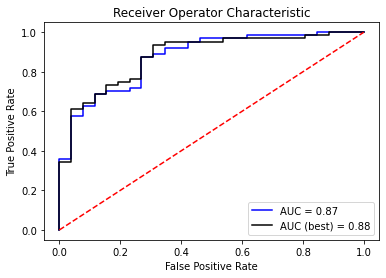

In [14]:
# Get probabilities instead of predicted values.
ex_best_test_probabilities = ex_best_model.predict_proba(ex_X_test_scaled)
print(ex_best_test_probabilities[0:5, ])
# Get probabilities of test predictions only.
ex_best_test_predictions = ex_best_test_probabilities[:, 1]
print(ex_best_test_predictions[0:5])

# Get ROC curve metrics.
ex_best_fpr, ex_best_tpr, ex_best_threshold = metrics.roc_curve(ex_y_test, ex_best_test_predictions)
ex_best_auc = metrics.auc(ex_best_fpr, ex_best_tpr)
print(ex_best_auc)

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(ex_fpr, ex_tpr, 'blue', 
         label = 'AUC = %0.2f'%ex_auc)
plt.plot(ex_best_fpr, ex_best_tpr, 'black', 
         label = 'AUC (best) = %0.2f'%ex_best_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



